### Use Principle Component Analysis to reduce the variable dimensions to 2 for visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('kaggle_data/bbc-text.csv')
print(df.shape, df['category'].nunique())
df.head(2)

(2225, 2) 5


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...


In [3]:
vec = TfidfVectorizer()
encoded_x = vec.fit_transform(df['text'])
encoded_x.shape

(2225, 29421)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(encoded_x.toarray())
x_pca.shape

(2225, 2)

In [30]:
x_pca

array([[ 0.1222725 , -0.12451614],
       [-0.03953008,  0.03562622],
       [ 0.02496219,  0.10598434],
       ...,
       [-0.0759032 ,  0.00223411],
       [ 0.15037848,  0.00544064],
       [ 0.02455455,  0.15839914]])

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encoded_category = le.fit_transform(df['category'])
df['encoded_category'] = encoded_category

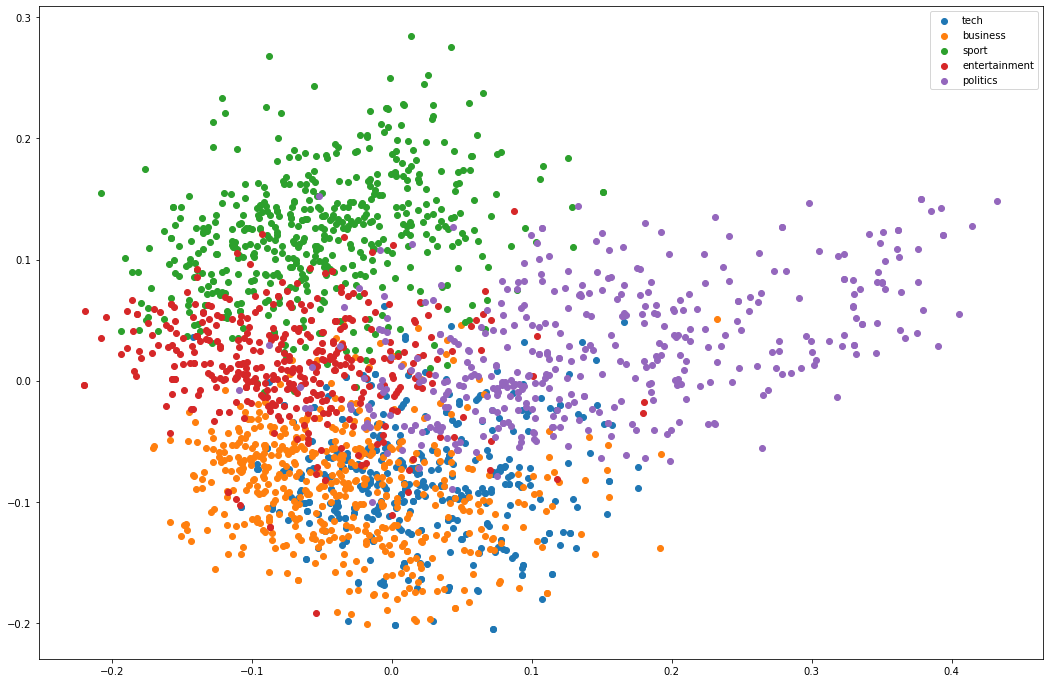

In [41]:
plt.figure(figsize=(18, 12))
encoded_categories = df['encoded_category'].unique()
for e in encoded_categories:
	mark = df['encoded_category'] == e
	plt.scatter(x_pca[:, 0][mark], x_pca[:, 1][mark], label=le.inverse_transform([e])[0])
plt.legend();